## A Deep Dive into Laptop Pricing From Historical Trends to Future Forecasts

### Learning Agenda of Notebook:

- **Machine Learning Project LifeCycle**
- **Problem Statement** 
- **Data Collection/ Data Acquisition**
- **Basic Understanding of Data**
- **Data Pre-processing** 
- **Exploratory Data Analysis**
- **Feature Engineering**
- **Model Building**
- **Model Evaluation**
- **Cross Validation and Hyper-Parameter Tunning**
- **Web Application using Streamlit**
- **Containerizing the WebApp using Docker**
- **Bonus: Scaling our Docker Container using Kubernetes**

## Machine Learning Project LifeCycle

<img src="images/lifeCycle.png" height=500px width=500px>

<br/>

The **machine learning project lifecycle** refers to the stages involved in developing and deploying a machine learning model. The project lifecycle typically includes the following stages:
<br/>



- **Problem Definition:** The first step is to define the problem we want to solve. This includes identifying the business or research problem, defining the data requirements, and determining the objectives and metrics for success.
<br/>
- **Data Collection:** The second step is to collect the data that we will use to build your model. This may involve acquiring data from various sources, including internal and external databases, APIs, and web scraping.
<br/>

- **Data Cleaning and Preparation:** Once we have collected the data, we need to clean and prepare it for analysis. This involves tasks such as removing duplicates, handling missing data, transforming the data into the appropriate format.
<br/>

- **Data Analysis and Visualization:** With the data cleaned and prepared, the next step is to analyze and visualize the data to gain insights into the problem we are trying to solve. This may include exploratory data analysis, data visualization, and feature selection.
<br/>

- **Model Selection and Training:** Once we have a clear understanding of the data, the next step is to select an appropriate machine learning model and train it on the data, before training we need to split the data into training and testing sets.. This step involves evaluating different models and selecting the one that provides the best performance.
<br/>

- **Model Evaluation:** Once we have trained the model, we need to evaluate its performance on a holdout test set. This involves calculating various metrics, such as mse, rmse, r2,  accuracy, precision, recall, and F1 score.
<br/>

- **Model Deployment:** If the model performs well, the next step is to deploy it in a production environment. This may involve integrating it with existing systems or building a custom application to provide access to the model.
<br/>

- **Model Maintenance and Monitoring:** After the model has been deployed, it is important to monitor its performance and ensure that it continues to provide accurate results. This involves tasks such as updating the model as new data becomes available, retraining the model periodically, and monitoring for drift or changes in the data distribution.
<br/>



## Problem Statement

<img src="images/problem.webp">

<h6>The purpose of this project is to provide a comprehensive analysis of the laptop market and forecast future prices based on historical trends and market dynamics. The project aims to inform decision making for industry participants and consumers alike and provide valuable insights into the laptop market.

<br/>
<br/>

    
The laptop market is constantly changing, with new models being introduced, technology advancements, and fluctuations in consumer demand. The challenge is to accurately predict future prices based on the vast amount of data available and changing market conditions.</h6>

## Data Collection / Data Acquisition

<br/>
<img src="images/data_collection.jpg" height=400px width=400px>
<br/>

Here you can download the [dataset-kaggle](https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset)

In [320]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import warnings
warnings.filterwarnings('ignore')
import re

In [321]:
# After downloading dataset, to load dataset we use `pd.read_csv` function
df = pd.read_csv('datasets/laptopData.csv')

## Basic Understanding of Data

- View first/last five rows
- Dimension of data
- Data types of each column
- Descriptive View of data
- Check missing values
- Check duplicate values

In [322]:
# View first records
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [323]:
# View last records
df.tail(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [324]:
# Dimension of Data
df.shape

(1303, 12)

In [325]:
# Check missing values
df.isna().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

> **Observation:** All columns have some percentage of missing values.

In [95]:
# Data-types of each column
df.dtypes

Unnamed: 0          float64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

> **Observation:** Some columns like `Inches`, `Ram` and `Weight` have `Object` data-type, we need to modify the data types of these columns.


In [96]:
# Descriptive view of data
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [97]:
# Check Duplicate values
df.duplicated().sum()

29

## Data Preprocessing
- Convert all columns into lowercase and replace spaces with `_`
- Drop Un-necessary columns

In [326]:
# Convert all columns into lowercase and replace spaces with _
df.columns = df.columns.str.lower().str.replace(" ","_")

In [327]:
df.columns

Index(['unnamed:_0', 'company', 'typename', 'inches', 'screenresolution',
       'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight', 'price'],
      dtype='object')

In [328]:
# Drop Un-necessary columns
df.drop('unnamed:_0', axis=1, inplace=True)

In [329]:
df.columns

Index(['company', 'typename', 'inches', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys', 'weight', 'price'],
      dtype='object')

### Cleaning of `Ram` Column

In [330]:
# In this column we remove  characters from the value of the column
# unique values in the ram column
df.ram.unique()

array(['8GB', '16GB', '4GB', nan, '2GB', '12GB', '64GB', '6GB', '32GB',
       '24GB', '1GB'], dtype=object)

In [331]:

# "8GB".replace("GB","")

df.ram =  df.ram.str.replace("GB","")

In [332]:
df.head(2)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


### Cleaning of `Weight` Column

In [333]:
# In this column we remove  characters like `kg` from the value of the column
# df.weight.unique()

In [334]:
df.weight  =  df.weight.str.replace("kg","")

In [335]:
df.head(2)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


### Cleaning of `gpu` column

In [336]:
# gpu column contains many unique values
df.gpu.value_counts()

Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: gpu, Length: 110, dtype: int64

In [337]:
df.gpu[0].split()[0]

'Intel'

In [64]:
# Here we just fetch the brand of the gpu and contain a new column which 
# contains the information related to gpu brand



# But, when we run this code, it will raise an error because our column
# also contain some missing values
df.gpu.apply(lambda x :x.split()[0])

In [338]:
# To handle this error, we need to create a function 

def gpu_modification(value):
    if type(value) == str:
        return value.split()[0]
    else:
        return value        

In [339]:
df['gpu_brand'] =  df.gpu.apply(gpu_modification)

In [341]:
# unique values in gpu_brand column
df.gpu_brand.value_counts()

Intel     703
Nvidia    393
AMD       176
ARM         1
Name: gpu_brand, dtype: int64

In [342]:
# we delete a row which contain `ARM` value because of imbalance data
df = df[df.gpu_brand != 'ARM' ]

In [343]:
# unique values in gpu_brand column
df.gpu_brand.value_counts()

Intel     703
Nvidia    393
AMD       176
Name: gpu_brand, dtype: int64

In [344]:
# now, delete `gpu` column from the dataframe
df.drop('gpu', axis=1, inplace=True)

In [345]:
df.head(2)

,company,typename,inches,screenresolution,cpu,ram,memory,opsys,weight,price,gpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,71378.6832,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,47895.5232,Intel


### Cleaning of `opsys` column

In [346]:
df.opsys.value_counts()

Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: opsys, dtype: int64

In [347]:
def os_types(value):
    if value =='Windows 10' or value == 'Windows 7' or value == 'Windows 10 s':
        return 'Windows'
    elif value == 'macOS' or value =='Mac OS X':
        return 'Mac'
    elif type(value) ==float:
        return value
    else:
        return 'Others/No OS/ Linux'

In [348]:
df['os'] =  df.opsys.apply(os_types)

In [349]:
df.os.value_counts()

Windows                1092
Others/No OS/ Linux     159
Mac                      21
Name: os, dtype: int64

In [350]:
# now, delete `opsys` column from the dataframe
df.drop('opsys', axis=1, inplace=True)

### Cleaning of `cpu` column

In [351]:
# unique values in `cpu` column
df.cpu.value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
AMD E-Series 9000e 1.5GHz        1
Name: cpu, Length: 117, dtype: int64

In [352]:
# " ".join(df.cpu[0].split(" ")[:3])

In [353]:
# Here we create a function to fetch name of the cpu
def cpu_name(value):
    if type(value) == float:
        return value
    else:
        return " ".join(value.split(" ")[:3])

In [354]:
df['cpu_name'] =  df.cpu.apply(cpu_name)

In [355]:
df.cpu_name.value_counts()

Intel Core i7               515
Intel Core i5               410
Intel Core i3               134
Intel Celeron Dual           79
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           4
AMD A8-Series 7410            4
AMD A9-Series 9410            3
Intel Atom x5-Z8550           3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD E-Series E2-9000e         2
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
AMD E-Series 7110             2
Intel Xeon E3-1505M           2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
AMD A12-Series 9700P          1
AMD E-Series 9000             1
AMD E-Series 9000e            1
AMD FX 8800P                  1
AMD A4-S

In [356]:
def fetch_processor(value):
    if value == 'Intel Core i7' or value == 'Intel Core i5' or value == 'Intel Core i3':
        return value
    elif type(value) == float:
        return value
    else:
        if value.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [357]:
df['cpu_brand'] = df.cpu_name.apply(fetch_processor)

In [358]:
df.cpu_brand.value_counts()

Intel Core i7            515
Intel Core i5            410
Other Intel Processor    151
Intel Core i3            134
AMD Processor             62
Name: cpu_brand, dtype: int64

In [359]:
df.head(2)

,company,typename,inches,screenresolution,cpu,ram,memory,weight,price,gpu_brand,os,cpu_name,cpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,1.37,71378.6832,Intel,Mac,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,1.34,47895.5232,Intel,Mac,Intel Core i5,Intel Core i5


In [361]:
# now delete `cpu`, `cpu_name` column from the dataframe
df.drop(['cpu','cpu_name'], axis=1, inplace=True)

In [362]:
df.head(2)

,company,typename,inches,screenresolution,ram,memory,weight,price,gpu_brand,os,cpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,1.37,71378.6832,Intel,Mac,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,1.34,47895.5232,Intel,Mac,Intel Core i5


### Cleaning of `Screen Resolution` Column

In [363]:
df.screenresolution.value_counts()

Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [364]:
# our dataframe contains some systems which have touchscreen, first of all
# we will create a new column which will store information related to this column

def fetch_touchscreen(value):
    if type(value) == float:
        return value
    elif 'Touchscreen' in value:
        return 1
    else:
        return 0

In [365]:
df['touchscreen']=  df.screenresolution.apply(fetch_touchscreen)


In [366]:
df.touchscreen.value_counts()

0.0    1088
1.0     184
Name: touchscreen, dtype: int64

> **IPS (in-plane switching) is a screen technology for liquid-crystal displays (LCDs). In IPS, a layer of liquid crystals is sandwiched between two glass surfaces.**

In [367]:
# our dataframe contains some systems which have ips, first of all
# we will create a new column which will store information related to this column

def fetch_ips(value):
    if type(value) == float:
        return value
    elif 'IPS' in value:
        return 1
    else:
        return 0

In [368]:
df['ips'] = df.screenresolution.apply(fetch_ips)

In [369]:
df.ips.value_counts()

0.0    914
1.0    358
Name: ips, dtype: int64

In [370]:
# Here screenresolution column contains screen resolution in both width and
# height , we will create a new column from these two values , which is Pixel per Inch(ppi)
# ppip is calculated by dividing the diagonal resolution of the display device by its diagonal size in inches. 
# For example, a display monitor with 12-inch width and 
# 9-inch height has a PPI of 85 in both the horizontal and vertical directions. 
# Higher resolution will result in more PPI


In [371]:

# df.screenresolution[0].split("x")

In [372]:
df.screenresolution.str.split("x", n=1, expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [373]:
df['x_resolution'] = df.screenresolution.str.split("x", n=1, expand=True)[0]
df['y_resolution'] = df.screenresolution.str.split("x", n=1, expand=True)[1]

In [374]:
df.x_resolution.str.replace(", ","")

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: x_resolution, Length: 1302, dtype: object

In [375]:
df.x_resolution.str.replace(',','').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: x_resolution, Length: 1302, dtype: object

In [376]:
df.x_resolution.str.replace(',','').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: x_resolution, Length: 1302, dtype: object

In [377]:
def fetch_res(value):
    if type(value) == float:
        return value
    else:
        text = value.replace(",","")
        return re.findall(r'(\d+\.?\d+)', text)[0]

In [378]:
df.x_resolution = df.x_resolution.apply(fetch_res)

now, we calculate PPI from above two columns, The formula to calculate Pixels Per Inch (PPI) using x_resolution, y_resolution, and diagonal size in inches (d) is:

$$ PPI = \frac{\sqrt{x_{resolution}^2 + y_{resolution}^2}}{diagonal~size~in~inches}$$


Where:

- x_resolution is the horizontal resolution of the display device
- y_resolution is the vertical resolution of the display device
- d is the diagonal size of the display device in inches.

Note: We could not perform above operation on our columns, because they contain some missing values, to handle this issue, we fill these missing values with `mode`.

In [379]:
x_mode = df.x_resolution.mode()[0]
y_mode = df.y_resolution.mode()[0]
inches = df.inches.mode()[0]

In [380]:
# Replace NaN values with mode

df.x_resolution = df.x_resolution.fillna(x_mode)
df.y_resolution = df.y_resolution.fillna(y_mode)
df.inches = df.inches.fillna(inches)

In [381]:
# Convert column to integer
df.x_resolution = df.x_resolution.astype(int)
df.y_resolution = df.y_resolution.astype(int)


In [382]:
# when we run this code, we will get an error that out column also contain some values 
# these values are `?`, we need to modify this column as well as overall dataframe

df[df.eq('?').any(1)]

,company,typename,inches,screenresolution,ram,memory,weight,price,gpu_brand,os,cpu_brand,touchscreen,ips,x_resolution,y_resolution
208,Dell,Ultrabook,13.3,Full HD 1920x1080,8,256GB SSD,?,77202.7200,Intel,Windows,Intel Core i7,0.0,0.0,1920,1080
476,Dell,Workstation,?,Full HD 1920x1080,8,256GB SSD,1.78,128298.2400,Nvidia,Windows,Intel Core i7,0.0,0.0,1920,1080
770,Dell,Notebook,15.6,Full HD 1920x1080,16,?,2.3,62938.0656,AMD,Windows,Intel Core i7,0.0,0.0,1920,1080


In [383]:
# We fill all the values with Nan where ? exist
df.replace("?", np.nan, inplace=True)

In [384]:
df[df.eq('?').any(1)]
# done

,company,typename,inches,screenresolution,ram,memory,weight,price,gpu_brand,os,cpu_brand,touchscreen,ips,x_resolution,y_resolution


In [385]:
df.inches = df.inches.astype(float)

In [386]:
(((df.x_resolution**2) + (df.y_resolution**2))**0.5/df.inches).astype('float')

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Length: 1302, dtype: float64

In [387]:
df['ppi'] =(((df.x_resolution**2) + (df.y_resolution**2))**0.5/df.inches).astype('float')

In [388]:
df.head(2)

,company,typename,inches,screenresolution,ram,memory,weight,price,gpu_brand,os,cpu_brand,touchscreen,ips,x_resolution,y_resolution,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,1.37,71378.6832,Intel,Mac,Intel Core i5,0.0,1.0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,1.34,47895.5232,Intel,Mac,Intel Core i5,0.0,0.0,1440,900,127.677940


In [389]:
df.columns

Index(['company', 'typename', 'inches', 'screenresolution', 'ram', 'memory',
       'weight', 'price', 'gpu_brand', 'os', 'cpu_brand', 'touchscreen', 'ips',
       'x_resolution', 'y_resolution', 'ppi'],
      dtype='object')

In [390]:
# now, we delete unnecessary columns from the dataframe like `inches`, `screenresolution`, `x_resolution`, `y_resolution`
df.drop(['inches', 'screenresolution','x_resolution','y_resolution'], axis=1, inplace=True)

In [391]:
df.head(2)

,company,typename,ram,memory,weight,price,gpu_brand,os,cpu_brand,touchscreen,ips,ppi
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,Intel,Mac,Intel Core i5,0.0,1.0,226.983005
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,Intel,Mac,Intel Core i5,0.0,0.0,127.677940


### Cleaning of `memory` Column

In [392]:
df.memory.value_counts()

256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                36
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [393]:
df.memory =  df['memory'].astype(str).replace('\.0', '', regex=True)

In [394]:
df.memory = df.memory.str.replace('GB', '')
df.memory = df.memory.str.replace('TB', '000')

In [395]:
df.memory.value_counts()

256 SSD                         401
1000 HDD                        218
500 HDD                         130
512 SSD                         116
128 SSD +  1000 HDD              92
128 SSD                          74
256 SSD +  1000 HDD              71
32 Flash Storage                 36
nan                              31
2000 HDD                         16
512 SSD +  1000 HDD              14
64 Flash Storage                 14
1000 SSD                         13
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           4
128 Flash Storage                 4
16 SSD                            3
512 SSD +  2000 HDD               3
256 SSD +  500 HDD                2
256 SSD +  256 SSD                2
128 SSD +  2000 HDD               2
1000 SSD +  1000 HDD              2
512 Flash Storage                 2
512 SSD +  512 SSD          

In [396]:
new = df.memory.str.split("+", n = 1, expand = True)
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [397]:
df['first'] = new[0]
df['first'] = df['first'].str.strip()

In [398]:
df['second'] = new[1]
df.second

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: second, Length: 1302, dtype: object

In [399]:
df["layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [400]:
df.head(2)

,company,typename,ram,memory,weight,price,gpu_brand,os,cpu_brand,touchscreen,ips,ppi,first,second,layer1HDD,layer1SSD,layer1Hybrid,layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,Intel,Mac,Intel Core i5,0.0,1.0,226.983005,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,Intel,Mac,Intel Core i5,0.0,0.0,127.677940,128 Flash Storage,None,0,0,0,1


In [401]:
df['first'] = df['first'].str.replace(r'\D', '')

In [402]:
df.head(2)

,company,typename,ram,memory,weight,price,gpu_brand,os,cpu_brand,touchscreen,ips,ppi,first,second,layer1HDD,layer1SSD,layer1Hybrid,layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,Intel,Mac,Intel Core i5,0.0,1.0,226.983005,128,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,Intel,Mac,Intel Core i5,0.0,0.0,127.677940,128,None,0,0,0,1


In [403]:
df["second"].fillna("0", inplace = True)

In [404]:
df["layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [405]:
df['second'] = df['second'].str.replace(r'\D', '')

In [406]:
def change_type(value):
    if value != '':
        return int(value)
    else:
        return int(0)

In [407]:
df['first'] =  df['first'].apply(change_type)
df['second'] =  df['second'].apply(change_type)

In [408]:
df["HDD"]=(df["first"]*df["layer1HDD"]+df["second"]*df["layer2HDD"])
df["SSD"]=(df["first"]*df["layer1SSD"]+df["second"]*df["layer2SSD"])
df["Hybrid"]=(df["first"]*df["layer1Hybrid"]+df["second"]*df["layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["layer1Flash_Storage"]+df["second"]*df["layer2Flash_Storage"])

In [409]:
# now, we delete all un-necessary columns

df.drop(columns=['first', 'second', 'layer1HDD', 'layer1SSD', 'layer1Hybrid',
       'layer1Flash_Storage', 'layer2HDD', 'layer2SSD', 'layer2Hybrid',
       'layer2Flash_Storage'],inplace=True)

In [410]:
df.sample(3)

,company,typename,ram,memory,weight,price,gpu_brand,os,cpu_brand,touchscreen,ips,ppi,HDD,SSD,Hybrid,Flash_Storage
1094,HP,Netbook,4,128 SSD,2.4,85194.72,Intel,Windows,Intel Core i5,0.0,0.0,125.367428,0,128,0,0
699,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.211998,0,0,0,0
176,Acer,Notebook,4,128 SSD,2.1,23922.72,Intel,Windows,Intel Core i3,0.0,0.0,100.454670,0,128,0,0


In [411]:
df.drop('memory', axis=1, inplace=True)

### Modify Data-Types of the Columns

In [412]:
df.dtypes

# Two columns`(ram, weight)` in our dataframe have object, we need to modify 
# the data-tpes of these columns

company           object
typename          object
ram               object
weight            object
price            float64
gpu_brand         object
os                object
cpu_brand         object
touchscreen      float64
ips              float64
ppi              float64
HDD                int64
SSD                int64
Hybrid             int64
Flash_Storage      int64
dtype: object

In [413]:
# df.isna().sum()

In [414]:
df.ram = df.ram.astype(float)
df.weight = df.weight.astype(float)

In [415]:
df.dtypes

company           object
typename          object
ram              float64
weight           float64
price            float64
gpu_brand         object
os                object
cpu_brand         object
touchscreen      float64
ips              float64
ppi              float64
HDD                int64
SSD                int64
Hybrid             int64
Flash_Storage      int64
dtype: object

## Exploratory Data Analysis


- Correlation analysis
- Distribution analysis
- Outlier detection

In [416]:
# Separate Numerical columns and Categorical columns
numerical_columns = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical Columns are: ", numerical_columns)


categorical_columns = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns are: ", categorical_columns)

Numerical Columns are:  ['ram', 'weight', 'price', 'touchscreen', 'ips', 'ppi', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage']
Categorical columns are:  ['company', 'typename', 'gpu_brand', 'os', 'cpu_brand']


In [417]:
# Descriptive statistics

df.describe()

,ram,weight,price,touchscreen,ips,ppi,HDD,SSD,Hybrid,Flash_Storage
count,1272.000000,1271.000000,1272.000000,1272.000000,1272.000000,1301.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,8.466195,2.078348,59975.345751,0.144654,0.281447,145.834769,405.652842,179.231951,8.838710,4.460829
std,5.565188,0.807706,37340.426973,0.351890,0.449882,42.900756,514.783600,186.393746,92.602429,30.222077
min,1.000000,0.000200,9270.720000,0.000000,0.000000,44.019462,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.500000,31914.720000,0.000000,0.000000,127.335675,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.040000,52161.120000,0.000000,0.000000,141.211998,0.000000,128.000000,0.000000,0.000000
75%,8.000000,2.320000,79346.840400,0.000000,1.000000,157.350512,1000.000000,256.000000,0.000000,0.000000
max,64.000000,11.100000,324954.720000,1.000000,1.000000,352.465147,2000.000000,1024.000000,1000.000000,512.000000


In [418]:
corr = df.corr()
corr

,ram,weight,price,touchscreen,ips,ppi,HDD,SSD,Hybrid,Flash_Storage
ram,1.000000,0.282795,0.685521,0.096109,0.216237,0.291125,0.075651,0.568094,0.034111,-0.055145
weight,0.282795,1.000000,0.175448,-0.249658,0.003669,-0.275170,0.406987,-0.027494,0.074647,-0.153042
price,0.685521,0.175448,1.000000,0.190738,0.255987,0.471335,-0.095855,0.668271,0.007794,-0.037881
touchscreen,0.096109,-0.249658,0.190738,1.000000,0.150160,0.441472,-0.202834,0.248718,-0.039732,-0.024002
ips,0.216237,0.003669,0.255987,0.150160,1.000000,0.304672,-0.096804,0.234058,-0.023128,0.066671
ppi,0.291125,-0.275170,0.471335,0.441472,0.304672,1.000000,-0.285326,0.502921,-0.018547,0.076746
HDD,0.075651,0.406987,-0.095855,-0.202834,-0.096804,-0.285326,1.000000,-0.373160,-0.075271,-0.113239
SSD,0.568094,-0.027494,0.668271,0.248718,0.234058,0.502921,-0.373160,1.000000,-0.057651,-0.142039
Hybrid,0.034111,0.074647,0.007794,-0.039732,-0.023128,-0.018547,-0.075271,-0.057651,1.000000,-0.014099
Flash_Storage,-0.055145,-0.153042,-0.037881,-0.024002,0.066671,0.076746,-0.113239,-0.142039,-0.014099,1.000000


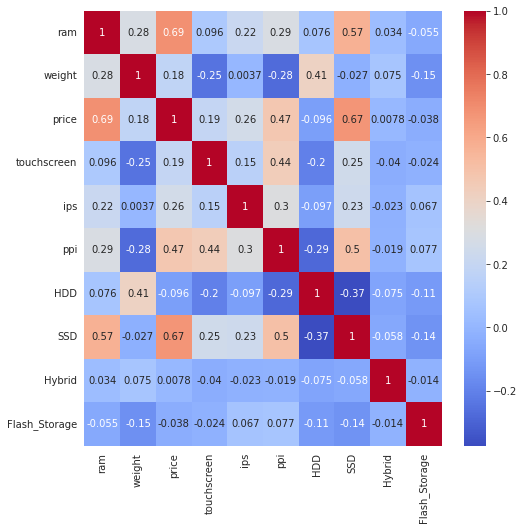

In [419]:
# Correlation analysis
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm');

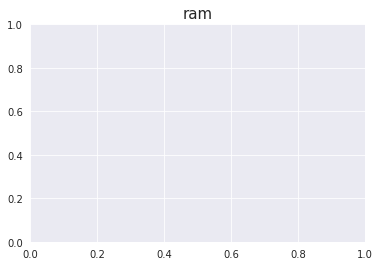

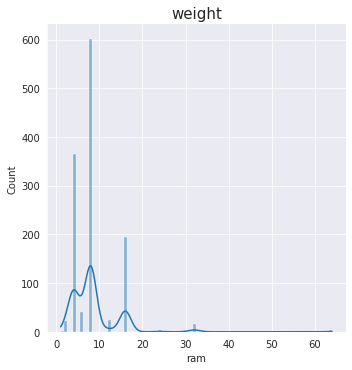

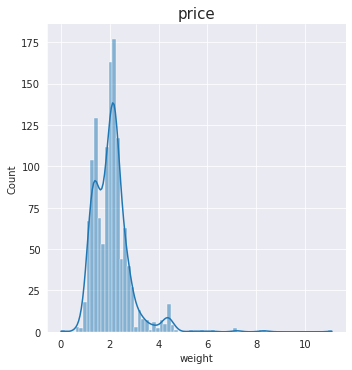

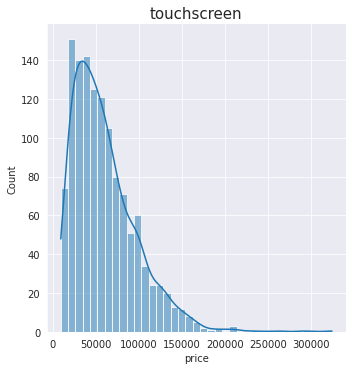

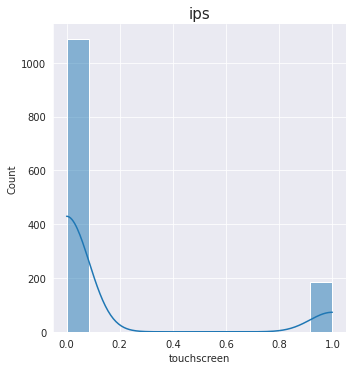

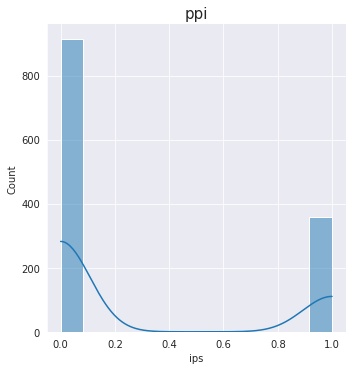

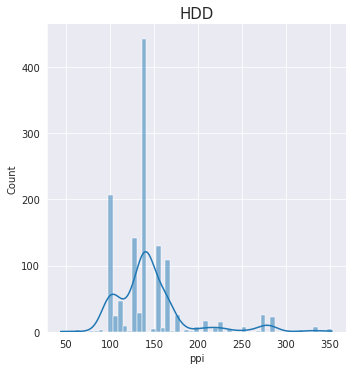

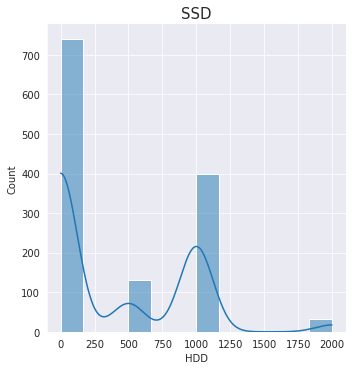

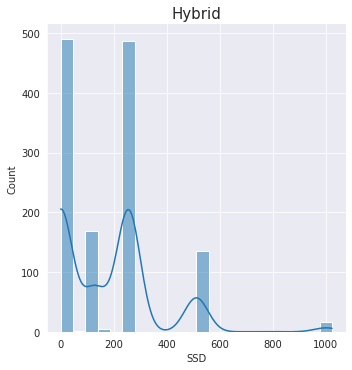

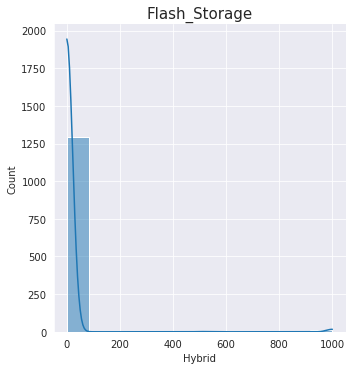

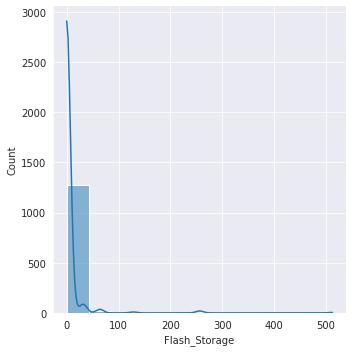

In [420]:
# Distribution analysis
for col in numerical_columns:
    plt.title(col, fontsize=15)
    sns.displot(df[col], kde=True)

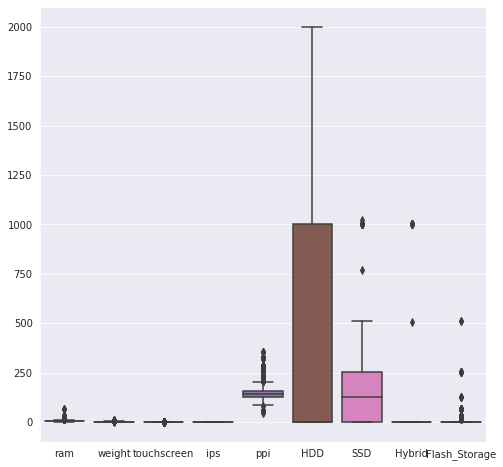

In [424]:
# Outlier detection
plt.figure(figsize=(8,8))
sns.boxplot(data=df.drop('price', axis=1));

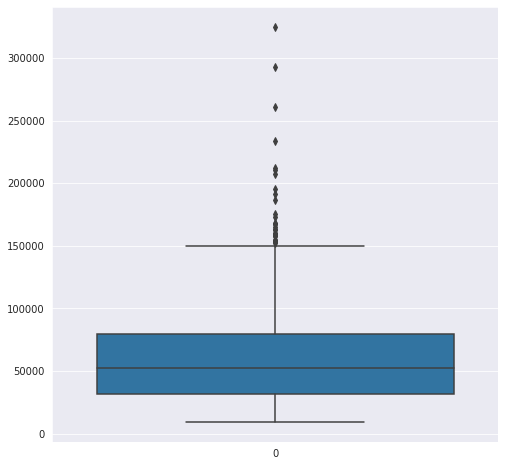

In [425]:
# Outlier detection
plt.figure(figsize=(8,8))
sns.boxplot(data=df['price']);

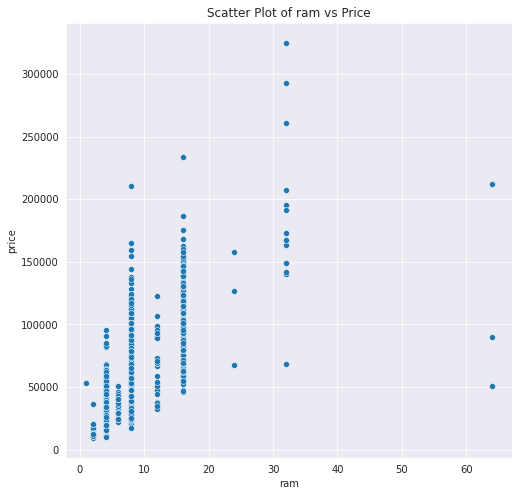

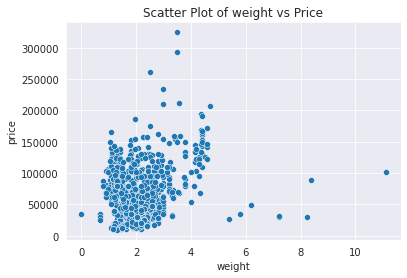

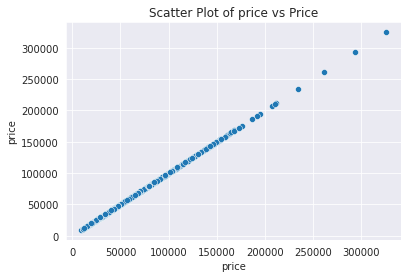

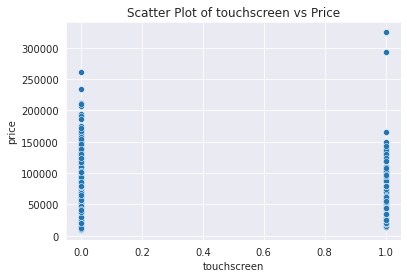

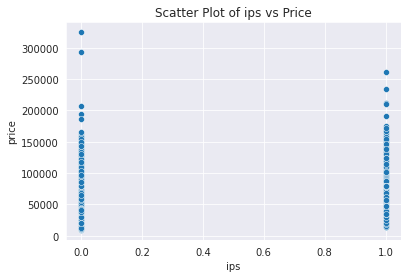

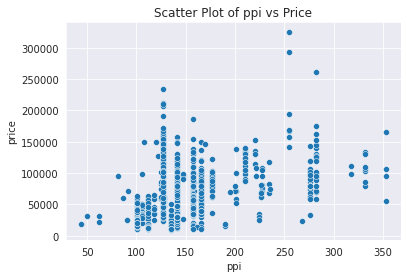

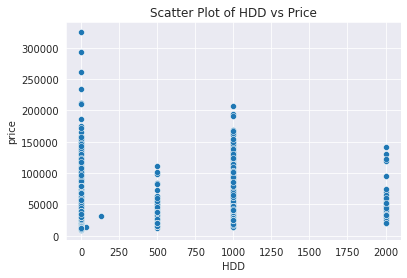

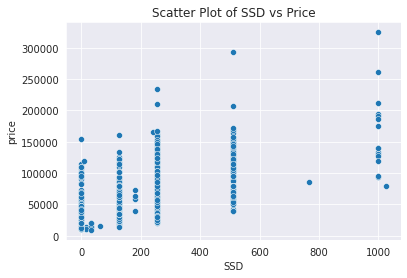

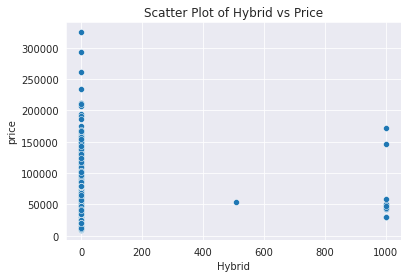

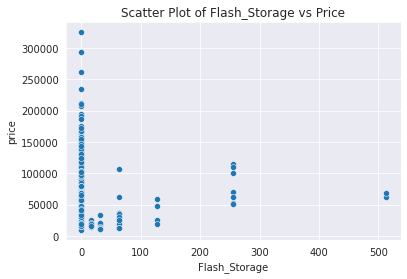

In [315]:
# Bi-Variate Analysis

plt.figure(figsize=(8,8))

for col in numerical_columns:
    sns.scatterplot(x=df[col], y=df.price)
    plt.title(f"Scatter Plot of {col} vs Price")
    plt.show()

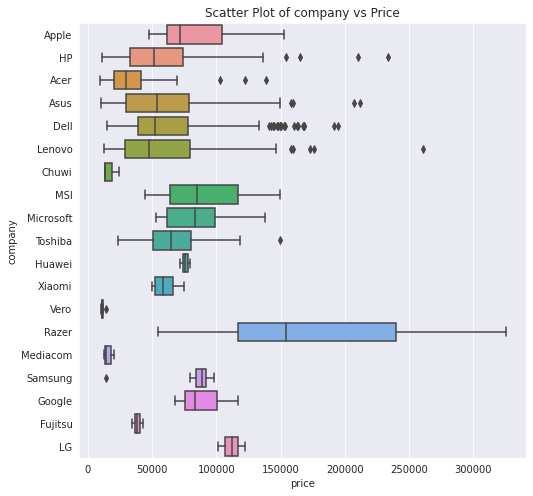

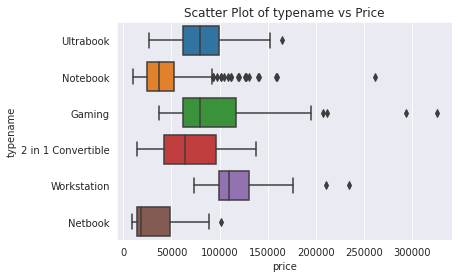

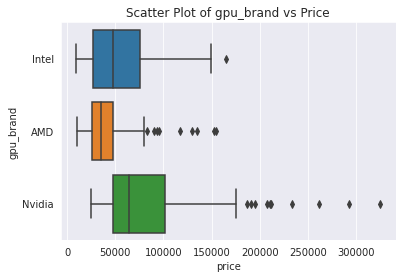

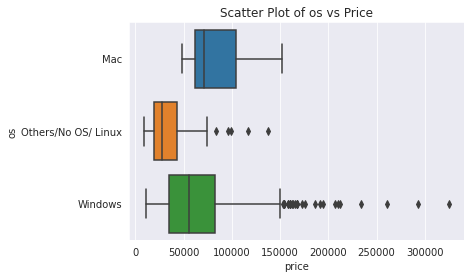

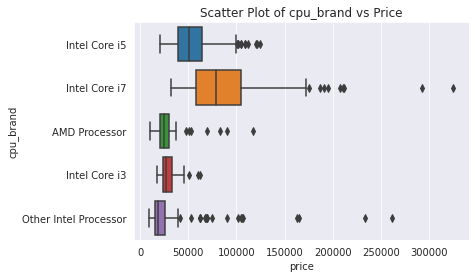

In [427]:
# Bi-Variate Analysis

plt.figure(figsize=(8,8))

for col in categorical_columns:
    sns.boxplot(y=df[col], x=df.price)
    plt.title(f"Scatter Plot of {col} vs Price")
    plt.show()

> **Observation:** Almost every-column contains outliers

## Feature Engineering

#### Pipeline for
- Missing values Imputation
- Encoding of Categorical Variables
- Handling Outliers
- Scaling of Numerical Columns

### Detection and Removal of Outliers

There are several methods to **detect outliers** in data, including:

- **Visualization:** This involves creating graphs and charts to visually inspect the data for any unusual patterns or observations that stand out.

- **Descriptive statistics:** This involves using statistical measures such as mean, median, standard deviation, and interquartile range (IQR) to identify any data points that are significantly different from the rest of the data.

- **Box plot:** This is a graphical representation of the distribution of data based on the median, IQR, and range of the data. Any data points that fall outside the whiskers of the box plot can be considered outliers.

- **Interquatile range:** This involes several quartile values, and an adjustment factor to calculate boundaries for what constitutes minor and major outliers. Minor and major denote the unusualness of the outlier relative to the overall distribution of values. Major outliers are more extreme. Analysts also refer to these categorizations as mild and extreme outliers.

- **Z-score:** This involves calculating the number of standard deviations a data point is from the mean. Any data point with a z-score greater than a certain threshold (usually 2 or 3) can be considered an outlier.

- **Grubbs' test:** This involves using a statistical test to determine if a data point is significantly different from the rest of the data. The test identifies the most extreme data point and compares it to the rest of the data to determine if it is an outlier. [Here](https://www.statisticshowto.com/grubbs-test/) you can read more about this method.

- **Local outlier factor (LOF):** This is a machine learning algorithm that assigns an outlier score to each data point based on the density of its surrounding data points. [Here](https://towardsdatascience.com/local-outlier-factor-lof-algorithm-for-outlier-identification-8efb887d9843) you can read more about this method.

Further Reading: [5 ways to Find Outliers in You Data](https://statisticsbyjim.com/basics/outliers/)


There are several methods to **handle outliers** in the data, including:

- **Deletion:** This involves removing any data points that are considered outliers. This method can be effective but may result in loss of important information and reduction in sample size.

- **Imputation:** This involves replacing the outlier values with a substitute value such as the mean, median, or mode. This method may be useful when there are only a few outliers or when the outliers are believed to be due to measurement errors.

- **Winsorization:** This involves replacing the extreme values with the nearest value that is not an outlier. For example, the 95th percentile could be replaced with the value at the 95th percentile.

- **Transformations:** This involves applying mathematical transformations to the data to reduce the impact of outliers. For example, the data can be transformed using the logarithm function or the square root function.

- **Binning:** This involves grouping the data into categories or bins based on the values of the variable. This can be useful when the variable is continuous and there are many outliers.

- **Model-based methods:** This involves using statistical models to identify and handle outliers. For example, robust regression models can be used that are less sensitive to outlier.

Further Reading: [How to Remove Outliers for Machine Learning?](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8)

In [937]:
# function to handle outliers for output label
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

def handle_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.3 * iqr
    high = q3 + 1.3 * iqr
    return df[(df[col] >= low) & (df[col] <= high)]


In [942]:
df = handle_outliers(df, 'price')

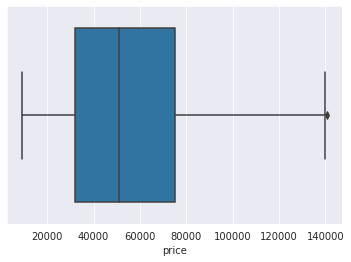

In [944]:
sns.boxplot(df.price);

<img src="images/outlier.png">

### Pipeline for Feature Engineering

#### Dealing Missing Values of Numerical Columns

- If we use the **mean** strategy, SimpleImputer replaces missing values with the mean value of the non-missing values in the column. This strategy is suitable when the missing values are missing at random, and the distribution of the variable is not skewed.

- If we use the **median** strategy, SimpleImputer replaces missing values with the median value of the non-missing values in the column. This strategy is suitable when the variable has a skewed distribution, and the median is a more representative measure of central tendency than the mean.

#### Dealing Missing Values of Categorical Columns

- Label encoding is used when the categorical data has an inherent order or hierarchy. In label encoding, each unique category is assigned a numerical label, with the labels assigned in ascending order based on their perceived order or hierarchy. For example, if the categorical feature is "size" with labels "small", "medium", and "large", label encoding might assign "small" a label of 1, "medium" a label of 2, and "large" a label of 3.

- One-hot encoding, on the other hand, is used when the categorical data has no inherent order or hierarchy, and each category is considered equally important. In one-hot encoding, each unique category is assigned a binary feature, with a value of 1 indicating that the instance belongs to that category, and a value of 0 indicating that it does not. For example, if the categorical feature is "color" with labels "red", "green", and "blue", one-hot encoding might create three binary features, with a value of 1 in the "red" feature indicating that the instance is red, and 0 in the "green" and "blue" features indicating that it is not green or blue.

#### Function to handle Outliers

In [866]:
# def handle_outliers(df):
#     for col in df.columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - (1.3 * IQR)
#         upper_bound = Q3 + (1.3 * IQR)
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df


### Pipeline for Feature Engineering of Numerical Columns

In [946]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline([
    # Fill missing of numerical columns values with median
    ('num_imputer', SimpleImputer(strategy='median', add_indicator=False)),
    
    # Remove outliers from the numerical columns
    ('num_robust', RobustScaler()),
    
    # Scaling of numerical columns
    ('num_scaling', StandardScaler())
])

In [842]:
# we perform robustscaler on ram, weight, ppi, SSD, HDD, Hybrid, Flash_Storage
# we perform standar scaling on ram, weight, ppi, SSD, HDD, Hybrid, Flash_Storage

### Pipeline for Feature Engineering of Categorical Columns

In [947]:
cat_pipeline = Pipeline([
    # filling missing values of categorical columns with most frequent value
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    
    # encoding of categorical columns
    ('cat_encoding', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

### Column-Transformer for Feature Engineering

In [948]:
preprocessor = ColumnTransformer(
    transformers=[
       ('cat_pipe', cat_pipeline, ['company','typename','gpu_brand','os','cpu_brand']),
        ('num_pipe', num_pipeline, ['ram', 'weight', 'ppi', 'SSD', 'HDD', 'Hybrid', 'Flash_Storage'])
    ])

In [1053]:
from sklearn import set_config
set_config(display='diagram')
display(preprocessor)

ColumnTransformer(transformers=[('cat_pipe',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['company', 'typename', 'gpu_brand', 'os',
                                  'cpu_brand']),
                                ('num_pipe',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('num_robust', RobustScaler()),
                                                 ('num_scaling',
                                                  StandardScaler())]),
                                 ['ram', 'weight', 'ppi', 'SSD', 'HDD',
                                  'Hybrid', 'Flash_Storage'])])

### Save Column-Transformer Instance using joblib

In [1055]:
joblib.dump(preprocessor, 'model/column_Transfomer')

['model/column_Transfomer']

## Model Building

- Separate Features and target variable 
- Train/Test/Validate Split
- Model Training
- Model Prediction
- Impact of features on target variable

In [950]:
# Separate features columns and label column

features = df.drop('price', axis=1)
label = df['price']

In [951]:
# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)



In [952]:
# Separate Numerical columns and Categorical columns
numerical_columns = X_train.select_dtypes(include=np.number).columns.to_list()
print("Numerical Columns are: ", numerical_columns)


categorical_columns = X_train.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns are: ", categorical_columns)

Numerical Columns are:  ['ram', 'weight', 'touchscreen', 'ips', 'ppi', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage']
Categorical columns are:  ['company', 'typename', 'gpu_brand', 'os', 'cpu_brand']


#### Fit and Transform

In [953]:
# Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)

In [954]:
# Transform  test data using the fitted transformer
X_test_processed = preprocessor.transform(X_test)

### Linear Regression

In [955]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# create instance/object of linear regression
lin_reg = LinearRegression()

In [956]:
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [957]:
regression_y_pred = lin_reg.predict(X_test_processed)

In [958]:
print("Mean Squared Error: ")
np.sqrt(mean_squared_error(regression_y_pred,y_test))

Mean Squared Error: 


17558.4754845448

In [959]:
print("R2 Score: ")
print(r2_score(regression_y_pred,y_test))

R2 Score: 
0.6193507186549406


In [960]:
# intercept of the model
lin_reg.intercept_

1.6496184454779085e+17

In [961]:
# weights of the model features
lin_reg.coef_

array([-3.14195587e+17, -5.63552855e+17, -3.14195587e+17, -3.14195587e+17,
       -3.14195587e+17, -3.14195587e+17, -3.14195587e+17, -3.14195587e+17,
       -3.14195587e+17, -3.14195587e+17, -3.14195587e+17, -3.14195587e+17,
       -3.14195587e+17, -3.14195587e+17, -3.14195587e+17, -3.14195587e+17,
       -3.14195587e+17, -3.14195587e+17, -3.14195587e+17, -1.84066105e+17,
       -1.84066105e+17, -1.84066105e+17, -1.84066105e+17, -1.84066105e+17,
       -1.84066105e+17,  1.65677782e+17,  1.65677782e+17,  1.65677782e+17,
        2.09288529e+17, -4.00687393e+16, -4.00687393e+16,  2.07690805e+17,
        2.07690805e+17,  2.07690805e+17,  2.07690805e+17,  2.07690805e+17,
        4.35200000e+03,  1.60000000e+03,  5.18400000e+03,  8.64000000e+03,
        1.69600000e+03,  6.40000000e+01,  1.04800000e+03])

In [962]:
# There is some difference between actual and predicted values
pd.DataFrame({'Actual Value ':y_test, 'Predicted Value ': regression_y_pred}).head(10)

,Actual Value,Predicted Value
1252,30316.32,35392.0
917,85194.72,96448.0
104,71395.20,81312.0
458,95850.72,74016.0
61,46833.12,70528.0
1189,138474.72,80800.0
339,60885.72,51936.0
1037,91908.00,84064.0
430,14332.32,38656.0
906,79014.24,89824.0


### Lasso Regression

In [963]:
# create instance/object of lasso regression
las_reg = Lasso()

In [964]:
las_reg.fit(X_train_processed, y_train)

Lasso()

In [965]:
lasso_y_pred = las_reg.predict(X_test_processed)

In [966]:
print("Mean Squared Error: ")
np.sqrt(mean_squared_error(lasso_y_pred,y_test))

Mean Squared Error: 


17352.805530796562

In [967]:
print("R2 Score: ")
print(r2_score(lasso_y_pred,y_test))

R2 Score: 
0.5994638549698932


### Ridge Regression

In [968]:
# create instance of ridge regression
rid_reg = Ridge()

In [969]:
rid_reg.fit(X_train_processed, y_train)

Ridge()

In [970]:
rid_y_pred = rid_reg.predict(X_test_processed)

In [971]:
print("Mean Squared Error: ")
np.sqrt(mean_squared_error(rid_y_pred,y_test))

Mean Squared Error: 


17154.402190343502

In [972]:
print("R2 Score: ")
print(r2_score(rid_y_pred,y_test))

R2 Score: 
0.6038037750906864


## Model Evaluation


<img src="images/evaluation.gif" height=500px width=500px>


- **Mean Absolute Error(MAE)**
- **Mean Squared Error(MSE)**
- **Root Mean Squared Error(MSE)**
- **R-Squared (R2)**
- **Adjusted R-Squared**

In [973]:
# Function to evaluate the performance of different models

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_linear_regression(model, y_true, y_pred):
    """
    This function evaluates the performance of a linear regression model using various evaluation techniques.
    
    Args:
    - model: name of the model which we want to evaluate
    - y_true: numpy array or Pandas Series of the true target values
    - y_pred: numpy array or Pandas Series of the predicted target values
    
    Returns:
    - dictionary containing the evaluation metrics
    """
    
    # Compute the evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Create a dictionary of the evaluation metrics
    evaluation_metrics = {'Model': model,
                          'Mean Absolute Error': mae,
                          'Mean Squared Error': mse,
                          'Root Mean Squared Error': rmse,
                          'R-squared': r2}
    
    return evaluation_metrics


In [901]:
# performance of linear regression

evaluate_linear_regression("Linear Regression ", y_test, regression_y_pred)

{'Model': 'Linear Regression ',
 'Mean Absolute Error': 14979.01617991968,
 'Mean Squared Error': 534552763.63572794,
 'Root Mean Squared Error': 23120.397134040064,
 'R-squared': 0.6908934242294513}

In [976]:
# performance of lasso regression

evaluate_linear_regression("Lasso Regression ", y_test, lasso_y_pred)

{'Model': 'Lasso Regression ',
 'Mean Absolute Error': 12172.130650528494,
 'Mean Squared Error': 301119859.7896437,
 'Root Mean Squared Error': 17352.805530796562,
 'R-squared': 0.6760607560241602}

In [977]:
# performance of ridge regression

evaluate_linear_regression("Ridg Regression ", y_test, rid_y_pred)

{'Model': 'Ridg Regression ',
 'Mean Absolute Error': 12137.026853008309,
 'Mean Squared Error': 294273514.50806195,
 'Root Mean Squared Error': 17154.402190343502,
 'R-squared': 0.6834259292015868}

## **Observation**
- Performance of all the models are almost same.

## Cross Validation and Hyper-Parameter Tunning


<img src="images/cross_validation.png" height=700px width=700px>

- **Choose a Model**
- **Cross Validation**
- **Define HyperParameters for Model**
- **Grid Search**
- **Evaluate Performance**
- **Impact of feature variables on Target**
- **Make Prediction on new unseen data**

In [981]:
from sklearn.model_selection import GridSearchCV, cross_val_score




# The hyperparameters to tune for each model
linear_params = {'fit_intercept': [True, False]}
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 1.5, 2, 3, 4, 6, 8, 10]}
ridge_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 1.5, 2, 3, 4, 6, 8, 10]}




# Instance of the models
linear_reg = LinearRegression()
lasso_reg = Lasso()
ridge_reg = Ridge()

In [982]:
# The GridSearchCV objects for each model

# for Linear Regression
linear_grid = GridSearchCV(linear_reg, param_grid=linear_params, cv=10, scoring='neg_mean_squared_error')

# for Lasso Regression
lasso_grid = GridSearchCV(lasso_reg, param_grid=lasso_params, cv=10, scoring='neg_mean_squared_error')

# for ridge regression
ridge_grid = GridSearchCV(ridge_reg, param_grid=ridge_params, cv=10, scoring='neg_mean_squared_error')

In [983]:
# Fit the models on training data

linear_grid.fit(X_train_processed, y_train)
lasso_grid.fit(X_train_processed, y_train)
ridge_grid.fit(X_train_processed, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 1.5, 2, 3,
                                   4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [984]:
# The best hyperparameters and the corresponding mean squared error on the train/test set for linear regression model

print("Linear Regression:")
print("Best hyperparameters: ", linear_grid.best_params_)
print('Training MSE:', mean_squared_error(y_train, linear_grid.predict(X_train_processed)))
print('Testing MSE:', mean_squared_error(y_test, linear_grid.predict(X_test_processed)))

Linear Regression:
Best hyperparameters:  {'fit_intercept': True}
Training MSE: 232382064.92415512
Testing MSE: 308300061.34136075


In [985]:
# The best hyperparameters and the corresponding mean squared error on the train/test set for lasso reg. model

print("Lasso Regression:")
print("Best hyperparameters: ", lasso_grid.best_params_)
print('Training MSE:', mean_squared_error(y_train, lasso_grid.predict(X_train_processed)))
print('Testing MSE:', mean_squared_error(y_test, lasso_grid.predict(X_test_processed)))

Lasso Regression:
Best hyperparameters:  {'alpha': 8}
Training MSE: 230168359.30454764
Testing MSE: 299852766.44096947


In [986]:
# The best hyperparameters and the corresponding mean squared error on the train/test set for ridge reg. model


print("Ridge Regression:")
print("Best hyperparameters: ", ridge_grid.best_params_)
print('Training MSE:', mean_squared_error(y_train, ridge_grid.predict(X_train_processed)))
print('Testing MSE:', mean_squared_error(y_test, ridge_grid.predict(X_test_processed)))

Ridge Regression:
Best hyperparameters:  {'alpha': 1}
Training MSE: 230527516.5859303
Testing MSE: 294273514.50806195


### Observation

- From above analysis , we can interpret that Ridge regression performance is better than linear and lasso regression

## Make Prediction of New Data 

In [1000]:
df.sample(2)

,company,typename,ram,weight,price,gpu_brand,os,cpu_brand,touchscreen,ips,ppi,HDD,SSD,Hybrid,Flash_Storage
825,Toshiba,Notebook,4.0,1.75,26586.72,Intel,Windows,Other Intel Processor,0.0,0.0,111.935204,0.0,128.0,0.0,0.0
1132,Asus,Notebook,4.0,1.50,14811.84,Intel,Windows,Other Intel Processor,0.0,0.0,111.935204,0.0,0.0,0.0,32.0


In [995]:
Input = {
    'company':'HP',
    'typename': 'Notebook',
    'ram': 16,
    'weight': 1.45,
    'gpu_brand' : 'Intel',
    'os' : 'Windows',
    'cpu_brand': 'Intel Core i7',
    'touchscreen' : 1,
    'ips': 1,
    'ppi' : 130,
    'HDD' : 500,
    'SSD' : 512,
    'Hybrid' : 0,
    'Flash_Storage': 0
}

data = pd.DataFrame(data=Input, index=[0])
data = preprocessor.transform(data)

In [998]:
print("price of new laptop is : ")
ridge_grid.predict(data)[0]

price of new laptop is : 


85107.30726589655

## Save Model for WebApp Development

In [1001]:
!mkdir model

In [1003]:
import joblib

In [1006]:
# save model
joblib.dump(ridge_grid, 'model/finalized_model')

['model/finalized_model.sav']

In [1011]:
# load model
model = joblib.load('model/finalized_model')

In [1013]:
model.predict(data)[0]

85107.30726589655

## WebApp Development using Streamlit

<img src="images/streamlit.png" height=500px width=500px align='right'>

- **Load the model** and **Create a Streamlit app**
- **Install required packages**
- **Create `requirements.txt`**
- **Create a `setup.sh` file**
- **Create a `Procfile`**
- **Create a `Heroku account`**
- **Connect app to `Git` repository**
- **Deploy app to Heroku**
- **Test the app**

In [ ]:
# Streamlit App
!cat app.py

### Application User Interface

![](images/App.png)

In [1059]:
# To create a requirements.txt file
!pip3 freeze  > requirements.txt

In [ ]:
# To create a setup.sh file, we use following lines

mkdir -p ~/.streamlit/

echo "\
[general]\n\
email = \"your-email@domain.com\"\n\
" > ~/.streamlit/credentials.toml

echo "\
[server]\n\
headless = true\n\
port = $PORT\n\
enableCORS = false\n\
\n\
" > ~/.streamlit/config.toml

**These lines create the necessary directories for Streamlit, set the email for Streamlit credentials, and configure the Streamlit server to run on the port specified by the $PORT environment variable.**

In [ ]:
# To create a Procfile

web: sh setup.sh && streamlit run app.py

## Containerizing the WebApp using Docker


<img src="images/vm_vs_docker.png" height=500px width=500px>


- **Install Docker from this [website](https://www.simplilearn.com/tutorials/docker-tutorial/how-to-install-docker-on-ubuntu)**
- **Create a Dockerfile**
- **Build the Docker image**
- **Test the Docker image**
- **Publish the Docker image**
- **Deploy the Docker image**


### Step by Step Implementation

#### Step1: Copy the following files to the project directory:
- app.py
- laptop_price_prediction_model.pkl
- categorical_encoder.pkl
- numerical_scaler.pkl
- requirements.txt
- setup.sh
- Procfile

#### Step2: Create a new file named `Dockerfile` in the project directory

#### Step3: In the Dockerfile, specify the base image , by using following code

<p style="text-align:center; color:red"><b>FROM python:3.8-slim-buster</b></p>


#### Step4: Set the working directory for the application by using following code
<p style="text-align:center; color:red"><b>WORKDIR /app</b></p>


#### Step5: Copy the files needed for the application into the container 
<p style="text-align:center; color:red"><b>COPY . .</b></p>


#### Step6: Install the dependencies needed for the application

<p style="text-align:center; color:red"><b>RUN pip3 install -r requirements.txt</b></p>


#### Step7: Expose the port that the application listens
<p style="text-align:center; color:red"><b>EXPOSE 8501</b></p>

#### Step8: Start the application by following command
<p style="text-align:center; color:red"><b>CMD streamlit run app.py</b></p>


#### Step9: To build the Docker image, run following command
<p style="text-align:center; color:red"><b>docker build -t laptop-price-prediction-app .
 </b></p>
 
 <p>This process will take some time and install all the libraries.</p>


#### Step10: To run docker container

<p style="text-align:center; color:red"><b>docker run -p 8501:8501 laptop-price-prediction-app</b></p>
    
    
> **Note**: This will start a container from the laptop-price-prediction-app image and map port 8501 in the container to port `8501` on the host machine. The Streamlit application should be accessible at `http://localhost:8501` in a web browser.

In [ ]:
# Use an official Python runtime as a parent image
FROM python:3.7

# Copy the current directory contents into the container at /app
COPY . /app


# Set the working directory to /app
WORKDIR /app


# Install any needed packages specified in requirements.txt
RUN pip3 install -r requirements.txt

# Expose the port for Streamlit
EXPOSE 8501

# Run app.py when the container launches
CMD streamlit run app.py
